In [1]:
from pathlib import Path
import numpy as np
from PIL import Image
import glob
from facenet_models import FacenetModel
from vision_profile import FaceDatabase
from camera import take_picture
from estimation import plot_histograms, is_true_positive
from cosdistance import cosine_distance
from descriptor import descriptorMatch, displayFinalPicture

#import matplotlib.pyplot as plt
%matplotlib inline

model = FacenetModel()

In [9]:
labels = []

db = FaceDatabase(file_path="database.pkl")
for filename in glob.glob(r'.\pics\train\*.jpg'):
    pic = Image.open(filename)
    pic_arr = np.array(pic)
    boxes, prob, _ = model.detect(pic_arr)
    name = filename[13:-6]
    labels.append(name)
    descriptors = model.compute_descriptors(pic_arr, boxes) #gets descriptor for every file
    for i, d in enumerate(descriptors):
        if prob[i] > 0.99: #0.99 prob or greater, then the image is def a person
            db.add_image(name, d)
    print('added')
db.save()
print('saved')

added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
added
saved


In [2]:
"""db.load('database.pkl')
print(list(db.data.keys())[0])
print(list(db.data.values())[0].descriptors)
len(list(db.data.keys()))"""

"db.load('database.pkl')\nprint(list(db.data.keys())[0])\nprint(list(db.data.values())[0].descriptors)\nlen(list(db.data.keys()))"

Angelina_Jolie
Angelina_Jolie
Angelina_Jolie
Scarlett_Johansson
Scarlett_Johansson
Scarlett_Johansson
Tom_Cruise
Tom_Cruise
Tom_Cruise
Will_Smith
Will_Smith
Will_Smith


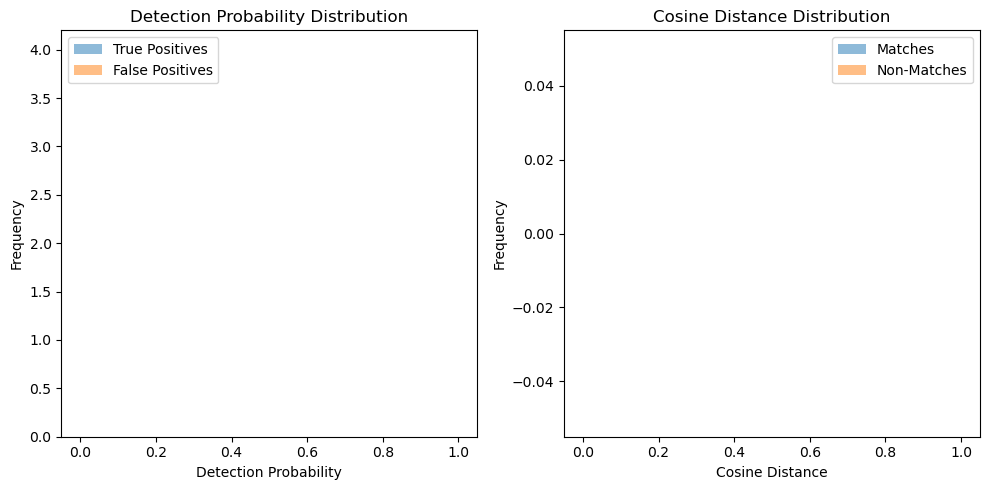

In [ ]:
%matplotlib inline
match_distances = []
non_match_distances = []
true_positives = []
false_positives = []


for filename in glob.glob(r'./pics/train/*.jpg'):

    pic = Image.open(filename)
    pic_arr = np.array(pic)
    boxes, probs, landmarks = model.detect(pic_arr)
    descriptors = model.compute_descriptors(pic_arr, boxes)
    

    for prob in probs:
        if is_true_positive(prob, threshold=0.5): # 0.5 is placeholder [0,1]
            true_positives.append(prob)
        else:
            false_positives.append(prob)

    # for i, descriptor1 in enumerate(descriptors):
    #     for j, descriptor2 in enumerate(descriptors):
    #         if i < j:
    #             distance = cosine_distance(descriptor1, descriptor2, labels)[0][0]
    #             if labels[i] == labels[j]:
    #                 match_distances.append(distance)
    #             else:
    #                 non_match_distances.append(distance)
    matches, non_matches = cosine_distance(descriptor1, descriptor2, labels)


plot_histograms(true_positives, false_positives, match_distances, non_match_distances)

    # print(descriptors)

    # detections = [detect_face_prob(img, model) for img in pic_arr]
    # descriptors = [extract_descriptors(img, boxes, model) for img, (boxes, _, _) in zip(pic_arr, detections)]
    # descriptors = np.concatenate(descriptors, axis=0)
    # labels = np.concatenate([[label] * len(boxes) for label, (boxes, _, _) in zip(pic_arr, detections)], axis=0)

    # match_distances, non_match_distances = cosine_distance(descriptors, labels, model)
    # true_positives = [prob for _, probs in detections for prob in probs if is_true_positive(prob, labels)]
    # false_negatives = [prob for _, probs in detections for prob in probs if not is_true_positive(prob, labels)]